# San Francisco Airport - Clustering

<img src="https://www.esri.com/about/newsroom/wp-content/uploads/2021/10/SFO_Vertical_826.jpg"/>

## Column Description

1. **<span style="color:red">Activity Period</span>**: Represents the activity period, typically in the format of year and month (e.g., 200507), indicating the relevant time period.
2. **<span style="color:red">Operating Airline</span>**: The name of the airline operating the flight (e.g., ATA Airlines, Air Canada).
3. **<span style="color:red">Operating Airline IATA Code</span>**: The IATA code of the operating airline (e.g., TZ, AC).
4. **<span style="color:red">Published Airline</span>**: The name of the officially published airline.
5. **<span style="color:red">Published Airline IATA Code</span>**: The IATA code of the published airline.
6. **<span style="color:red">GEO Summary</span>**: A geographical summary indicating whether the flight is domestic or international (Domestic, International).
7. **<span style="color:red">GEO Region</span>**: The geographical region associated with the flight (e.g., US, Canada).
8. **<span style="color:red">Activity Type Code</span>**: The code representing the type of activity, indicating the passenger status (Deplaned: passengers disembarked, Enplaned: passengers boarded, Thru/Transit: transit passengers).
9. **<span style="color:red">Price Category Code</span>**: The code representing the price category, indicating the fare type (e.g., Low Fare, Other).
10. **<span style="color:red">Terminal</span>**: The terminal from which passengers board or disembark.
11. **<span style="color:red">Boarding Area</span>**: The boarding area for passengers (e.g., B).
12. **<span style="color:red">Passenger Count</span>**: The number of passengers on the flight.


In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

### Importing Data

In [665]:
df = pd.read_csv("data/air-traffic-passenger-statistics.csv")

### EDA - Exploratory Data Analysis

In [666]:
df.shape

(18885, 12)

In [667]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [668]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
5541,200906,Midwest Airlines,YX,Midwest Airlines,YX,Domestic,US,Enplaned,Other,Terminal 3,E,2817
11435,201309,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Enplaned,Other,Terminal 3,F,7555
14419,201511,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,19800
15155,201605,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Deplaned,Other,International,G,7337
10382,201212,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Enplaned,Low Fare,Terminal 1,C,16137


In [669]:
df['Operating Airline'].nunique()

89

In [670]:
df['GEO Region'].nunique()

9

In [671]:
df.loc[df['Activity Type Code'] == 'Thru / Transit', 'Activity Type Code'] = 'Thru-Transit'

In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [673]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


### Check for Missing Values

In [674]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [675]:
df[df['Operating Airline IATA Code'].isnull()]['Operating Airline'].value_counts()

Operating Airline
Servisair               36
Swissport USA           22
Pacific Aviation         2
Trego Dugan Aviation     2
Boeing Company           1
Name: count, dtype: int64

In [676]:
df[df['Published Airline IATA Code'].isnull()]['Published Airline'].value_counts()

Published Airline
Servisair               36
Swissport USA           22
Pacific Aviation         2
Trego Dugan Aviation     2
Boeing Company           1
Name: count, dtype: int64

In [677]:
df.loc[df['Operating Airline']== 'Servisair', 'Operating Airline IATA Code'] = 'SA'
df.loc[df['Published Airline']== 'Servisair', 'Published Airline IATA Code'] = 'SA'

df.loc[df['Operating Airline']== 'Swissport USA', 'Operating Airline IATA Code'] = 'SU'
df.loc[df['Published Airline']== 'Swissport USA', 'Published Airline IATA Code'] = 'SU'

df.loc[df['Operating Airline']== 'Pacific Aviation', 'Operating Airline IATA Code'] = 'PA'
df.loc[df['Published Airline']== 'Pacific Aviation', 'Published Airline IATA Code'] = 'PA'

df.loc[df['Operating Airline']== 'Trego Dugan Aviation', 'Operating Airline IATA Code'] = 'TDA'
df.loc[df['Published Airline']== 'Trego Dugan Aviation', 'Published Airline IATA Code'] = 'TDA'

df.loc[df['Operating Airline']== 'Boeing Company', 'Operating Airline IATA Code'] = 'BC'
df.loc[df['Published Airline']== 'Boeing Company', 'Published Airline IATA Code'] = 'BC'

In [678]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

### Column Selection for Clustering

When performing clustering, the goal is to group data with similar characteristics based on specific criteria to derive meaningful insights from the dataset. In this case, we might focus on features such as passenger numbers, flight geography, and activity types. The columns to be used and their rationales are as follows:

- **Operating Airline IATA Code**: Represents the airline company. This code can help identify different customer groups based on airlines (e.g., frequent flyers).

- **GEO Summary**: Domestic or International flights. The geographic summary can significantly affect passenger behavior. Including this can help form different passenger clusters.

- **Geo Region**: Geographic regions (e.g., North America, Europe, Asia). Including geo regions helps to capture the regional variations in passenger behavior and flight patterns. This can provide insights into how regional factors influence customer preferences and travel habits, thereby improving the accuracy of the clustering process.

- **Activity Type Code**: Flight activity (Deplaned, Enplaned, Transit). This provides information about the passengers' status, which is crucial for analyzing passenger movements at the airport.

- **Price Category Code**: Ticket price category. This can be used to understand how ticket pricing affects customer segmentation and how it reflects in clustering.

- **Passenger Count**: The number of passengers. This is a direct metric for understanding flight volume and, consequently, passenger clusters at the airline and terminal levels.


In [679]:
x = df.drop(['Activity Period','Operating Airline', 'Published Airline', 'Published Airline IATA Code', 'Terminal', 'Boarding Area'], axis=1)

In [680]:
# Label Encoding for IATA Codes
from sklearn.preprocessing import LabelEncoder

# Combine both columns into a single array 

label_encoder = LabelEncoder()

x['Operating Airline IATA Code'] = label_encoder.fit_transform(x['Operating Airline IATA Code'])

# x.sample(5)


In [681]:
# One Hot Encoding for Categorical Columns required for the Clustering
x = pd.get_dummies(x, columns=['GEO Summary', 'Activity Type Code', 'Price Category Code', 'GEO Region'], drop_first=True, dtype=int)

In [682]:
x

,Operating Airline IATA Code,Passenger Count,GEO Summary_International,Activity Type Code_Enplaned,Activity Type Code_Thru-Transit,Price Category Code_Other,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US
0,72,27271,0,0,0,0,0,0,0,0,0,0,0,1
1,72,29131,0,1,0,0,0,0,0,0,0,0,0,1
2,72,5415,0,0,1,0,0,0,0,0,0,0,0,1
3,7,35156,1,0,0,1,0,1,0,0,0,0,0,0
4,7,34090,1,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,80,50,1,1,0,1,0,0,0,1,0,0,0,0
18881,79,10868,1,0,0,1,0,1,0,0,0,0,0,0
18882,79,11664,1,1,0,1,0,1,0,0,0,0,0,0
18883,64,804,1,0,0,1,0,0,0,1,0,0,0,0


In [683]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize

In [684]:
normalized_x = normalize(x)
normalized_x = pd.DataFrame(normalized_x, columns=x.columns)

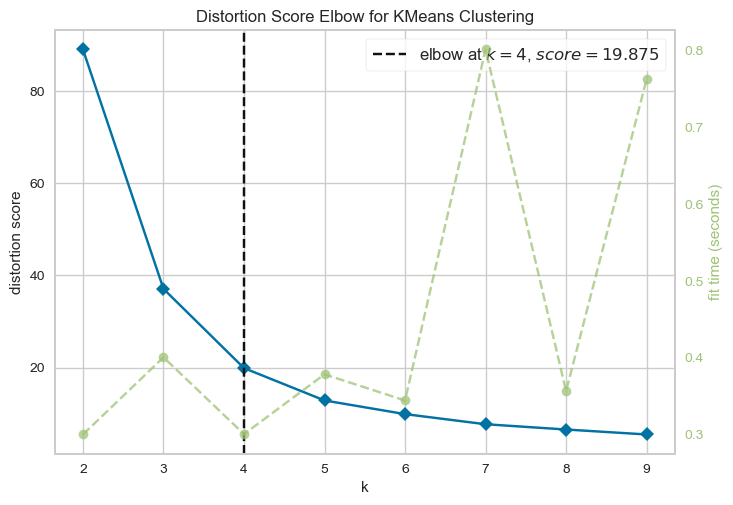

In [685]:

km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(normalized_x)
vis.show();

In [686]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [687]:
model = KMeans(n_clusters=4)

In [688]:
model = model.fit(normalized_x)

In [689]:
pred = model.predict(normalized_x)

In [690]:
normalized_x['Cluster'] = pred

In [691]:
silhouette_score(normalized_x, pred)

0.9863021441770915

In [692]:
normalized_x.head()

,Operating Airline IATA Code,Passenger Count,GEO Summary_International,Activity Type Code_Enplaned,Activity Type Code_Thru-Transit,Price Category Code_Other,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Cluster
0,0.002640,0.999997,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000037,0
1,0.002472,0.999997,0.000000,0.000034,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000034,0
2,0.013295,0.999912,0.000000,0.000000,0.000185,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000185,0
3,0.000199,1.000000,0.000028,0.000000,0.000000,0.000028,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.000000,0
4,0.000205,1.000000,0.000029,0.000029,0.000000,0.000029,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,0.000000,0


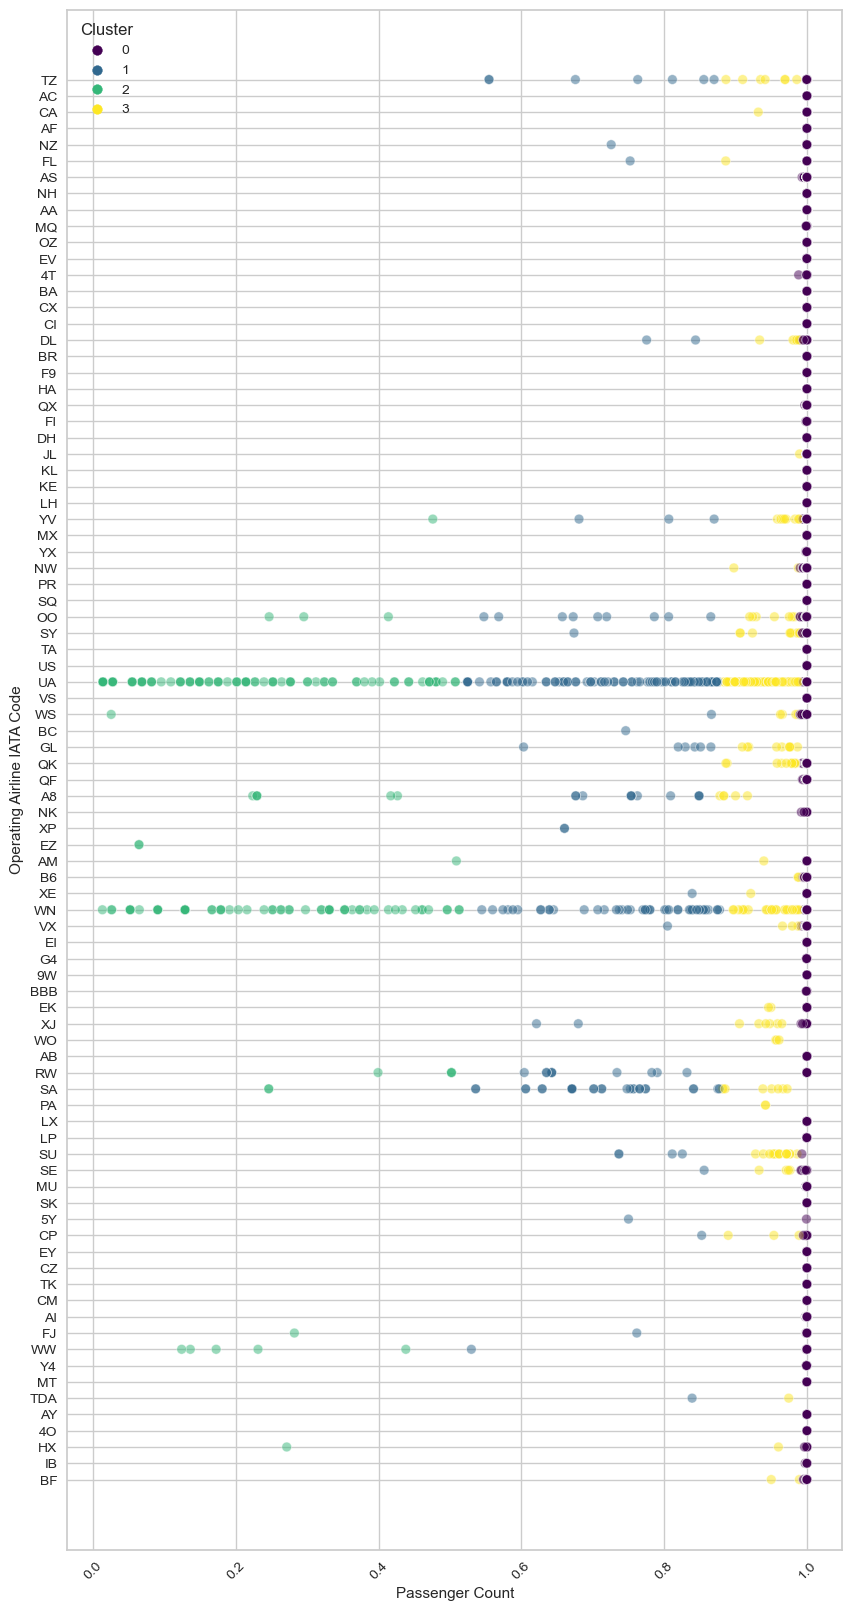

In [693]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=normalized_x['Passenger Count'], y=df['Operating Airline IATA Code'], hue=normalized_x['Cluster'], palette='viridis', alpha=0.5)
plt.xticks(rotation=45);

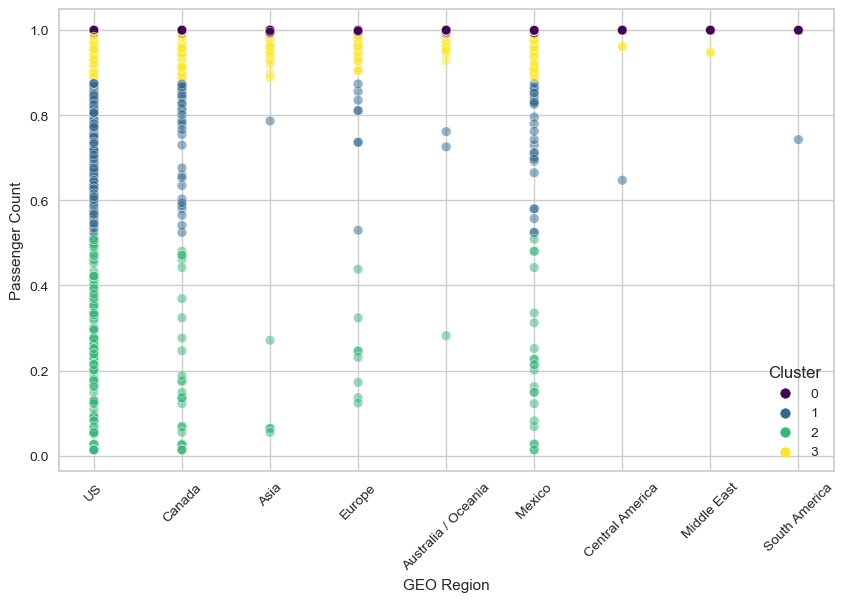

In [694]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['GEO Region'], y=normalized_x['Passenger Count'], hue=normalized_x['Cluster'], palette='viridis', alpha=0.5)
plt.xticks(rotation=45);


In [695]:
from sklearn.decomposition import PCA

In [696]:
pca = PCA(2)

In [697]:
normalized_x.drop('Cluster', axis=1, inplace=True)

In [698]:
pca_x = pca.fit_transform(normalized_x)

In [699]:
pca_x = pd.DataFrame(pca_x, columns=['PCA1', 'PCA2'])

In [700]:
pca_x['Cluster'] = pred

In [701]:
pca_x.head()

,PCA1,PCA2,Cluster
0,-0.030484,0.005608,0
1,-0.030627,0.005696,0
2,-0.021397,0.000044,0
3,-0.032556,0.006895,0
4,-0.032551,0.006891,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

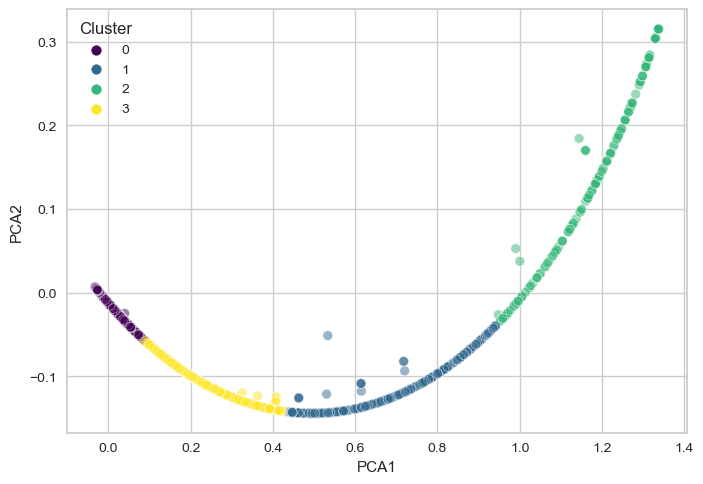

In [702]:
sns.scatterplot(x=pca_x['PCA1'], y=pca_x['PCA2'], hue=pca_x['Cluster'], palette='viridis', alpha=0.5)

## Result
We performed normalization for clustering because the passenger count was significantly higher compared to the other columns. <br> 
The optimal number of clusters we obtained was 4.

The silhouette score is 0.9863, <br>
 which indicates that the data points are well-clustered within their own clusters and are distinctly separated from other clusters.

However, despite normalization, clustering was still predominantly influenced by the passenger count. <br>
This situation shows that the passenger count had a greater impact compared to the other columns.
